In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [251]:
df = pd.read_csv('train.csv')

In [252]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [223]:
df.describe()

,VENDIDO
count,78331.00000
mean,0.60732
std,0.48835
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78331 entries, 0 to 78330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marca             77973 non-null  object
 1   nomeDaPeca        78331 non-null  object
 2   precoComDesconto  78331 non-null  object
 3   precoSemDesconto  76821 non-null  object
 4   Descricao         78323 non-null  object
 5   Tamanho           78055 non-null  object
 6   Condicao          78331 non-null  object
 7   Cores             76728 non-null  object
 8   VENDIDO           78331 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.4+ MB


In [253]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [254]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [135]:
df

,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,VENDIDO
0,sem marca,\nBlusa Verde Babados\n,64.00,160.0,Blusa verde com modelagem básica. Peça com bab...,m,gentilmente usada,verde,0
1,zara,\nSaia Lápis Zara\n,57.00,219.0,Marca: Zara Woman,38,gentilmente usada,"Detalhe: Dois bolsos frontais, forro, zíper tr...",1
2,1 a 9,\nJeans Skinny 1 a 9\n,69.00,279.0,"Medidas: cintura 32cm, quadril 43cm, comprime...",38,gentilmente usada,azul,0
3,Coach,Sapatilha Monograma,25000.00,87500.0,Sapatilha caramelo. Possui monograma em toda a...,39,Usado,\nCaramelo \nPreto \n,1
4,primeiro item teen,\nShorts Feminino Teen Corações\n,20.97,69.9,"Shorts feminino, com estampa de corações, do P...",m,gentilmente usada,colorido,0
...,...,...,...,...,...,...,...,...,...
78326,mandi,\nCamisa Preta Mandi\n,15.00,69.9,"Camisa feminina, preta, da Mandi. Tecido plano...",m,gentilmente usada,preto,0
78327,mo,\nSaia Branca Bordada\n,33.75,135.0,"Saia branca com bordados em linha prata, azul ...",p,gentilmente usada,branco,1
78328,luigi bertolli,\nVestido Floral Preto e Vermelho Luigi Bertol...,27.48,89.9,"Vestido preto com flores vermelhas, da Luigi B...",gg,gentilmente usada,colorido,1
78329,Zara,Blazer Tweed Bege,7000.00,28000.0,"Blazer em tweed, nas cores bege e dourado. Pos...",P,Usado,\nBege \n,1


In [255]:
df2 = pd.read_csv('test.csv')

In [256]:
df2['precoComDesconto'] = pd.to_numeric(df2['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df2['precoSemDesconto'] = pd.to_numeric(df2['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [257]:
df2['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df2['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [229]:
df.isnull().sum()

marca                358
nomeDaPeca             0
precoComDesconto       0
precoSemDesconto    1510
Descricao              8
Tamanho              276
Condicao               0
Cores               1603
VENDIDO                0
dtype: int64

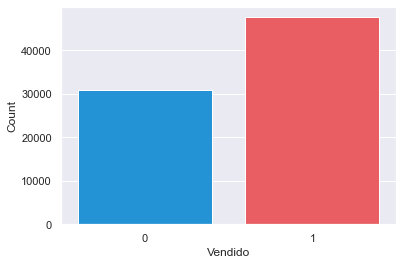

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x="VENDIDO", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Vendido')
plt.ylabel('Count')
plt.show()

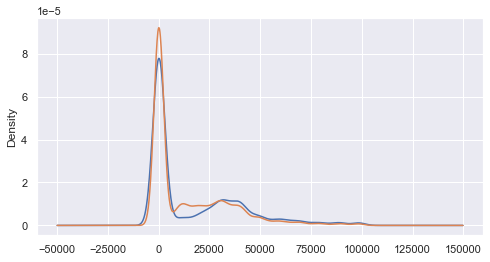

In [15]:
fig=plt.figure(figsize=(8,4))
for x in [0,1]:
    df['precoSemDesconto'][df['VENDIDO']==x].plot(kind='kde')
    


plt.show()

In [140]:
df['Tamanho'].unique()

array(['m', '38', ' 39', 'p', ' 38', ' 36', ' U', 'u', '34', ' M', '36',
       ' 42', 'g', 'pp', '42', ' 35', '40', ' P', '6', nan, '14', ' 34',
       ' 40', ' G', 'gg', '44', '3m', '50', '3', '4', ' PP', '8', '33',
       ' 6M', ' 3M', ' 10M', ' 12M', '12', '37', '35', '48', '16', ' RN',
       '2a', ' GG', ' 37', ' 44', '1', 'rn', '6m', '32', '21', '12m',
       'xgg', '18m', ' 8A', '7', ' 12A', '9m', '46', ' 2A', '5', '2',
       '39', '54', ' 20', ' 1A', ' 10A', ' 18', '10', '29', ' 4A', '30',
       ' 50', ' 6A', ' 48', ' 46', ' 16', '52', '11', ' 17', ' 33', '13',
       '22', ' 14A', '41', '20', '9', ' 21', ' 19', '31', '25', ' 41',
       '58', '17', ' 13', ' 26', '19', '28', '23', '26', ' 14', ' 4',
       '24', '43', ' 3A', ' 32', '56', ' 1', ' XLG', ' 23', ' 15', 'M',
       '27', '18', ' G3', ' 24', '15', ' 54', ' 3', ' 56', ' G4', '45',
       ' 5G', ' 28', '60', ' 27', 'P'], dtype=object)

In [258]:
for coluna in df.columns:
    # Verificando se a coluna contém dados do tipo string
    if df[coluna].dtype == 'O':  # 'O' é o código para tipo de objeto (string) em pandas
        # Removendo espaçamentos e convertendo para minúsculas
        df[coluna] = df[coluna].str.replace(' ', '').str.lower()

In [259]:
for coluna in df2.columns:
    # Verificando se a coluna contém dados do tipo string
    if df2[coluna].dtype == 'O':  # 'O' é o código para tipo de objeto (string) em pandas
        # Removendo espaçamentos e convertendo para minúsculas
        df2[coluna] = df2[coluna].str.replace(' ', '').str.lower()

In [260]:
equivalencia = {
    'pp': ['u','3','3m', 'rn', '2a', '1a', '18m', '8a', '12a','12m', '9m', '6m','4', '4a', '6a','6', '1','2','9','3a','5g'],
    'p': ['34', '35', '36', '37', '38', '39', '40', '42', '33', '32', '31', '30','7','5','18','17','14a','19'],
    'm': ['44', '46', '48', '50', '52', '54', '56', '58', '60', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20','41','43'],
    'g': ['g', '8', '10', '12', '14', '16', '15', '13', '11', '10a', '10m'],
    'gg': ['xgg', 'xlg', 'g3', 'g4', '45'],
}

# Função para mapear os tamanhos
def mapear_tamanho(tamanho):
    for metrica, valores in equivalencia.items():
        if tamanho in valores:
            return metrica
    return tamanho  # Se não houver correspondência, retorna o tamanho original

# Aplicar a função de mapeamento à coluna 'tamanho' no DataFrame
df['tamanho_mapeado'] = df['Tamanho'].apply(mapear_tamanho)
df2['tamanho_mapeado'] = df2['Tamanho'].apply(mapear_tamanho)

In [261]:
df['tamanho_mapeado'].unique()

array(['m', 'p', 'pp', 'g', nan, 'gg'], dtype=object)

In [91]:
df

,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,VENDIDO,tamanho_mapeado
0,semmarca,\nblusaverdebabados\n,64.00,160.0,blusaverdecommodelagembásica.peçacombabadoscur...,m,gentilmenteusada,verde,0,m
1,zara,\nsaialápiszara\n,57.00,219.0,marca:zarawoman,38,gentilmenteusada,"detalhe:doisbolsosfrontais,forro,zípertraseiro...",1,p
2,1a9,\njeansskinny1a9\n,69.00,279.0,"medidas:cintura32cm,quadril43cm,comprimento110cm",38,gentilmenteusada,azul,0,p
3,coach,sapatilhamonograma,25000.00,87500.0,"sapatilhacaramelo.possuimonogramaemtodaapeça,v...",39,usado,\ncaramelo\npreto\n,1,p
4,primeiroitemteen,\nshortsfemininoteencorações\n,20.97,69.9,"shortsfeminino,comestampadecorações,doprimeiro...",m,gentilmenteusada,colorido,0,m
...,...,...,...,...,...,...,...,...,...,...
78326,mandi,\ncamisapretamandi\n,15.00,69.9,"camisafeminina,preta,damandi.tecidoplano.model...",m,gentilmenteusada,preto,0,m
78327,mo,\nsaiabrancabordada\n,33.75,135.0,"saiabrancacombordadosemlinhaprata,azulevermelh...",p,gentilmenteusada,branco,1,p
78328,luigibertolli,\nvestidofloralpretoevermelholuigibertolli\n,27.48,89.9,"vestidopretocomfloresvermelhas,daluigibertolli...",gg,gentilmenteusada,colorido,1,gg
78329,zara,blazertweedbege,7000.00,28000.0,"blazeremtweed,nascoresbegeedourado.possuigolac...",p,usado,\nbege\n,1,p


In [67]:
df['tamanho_mapeado'].unique()

array(['m', 'p', '39', '38', '36', 'u', '42', 'g', 'pp', '35', '6', '34',
       '40', 'gg', '3', '4', '6m', '3m', '10m', '12m', 'rn', '37', '44',
       '8a', '7', '12a', '2a', '5', '2', '20', '1a', '10a', '18', '4a',
       '50', '6a', '48', '46', '16', '17', '33', '14a', '41', '9', '21',
       '19', '13', '26', '14', '43', '3a', '32', '1', 'xlg', '23', '15',
       'g3', '24', '54', '56', 'g4', '5g', '28', '27'], dtype=object)

In [262]:
def agrupar_cores(cor):
    if pd.isna(cor) or not isinstance(cor, str):
        return 'Desconhecido'
    cor = cor.lower().strip()
    if 'preto' in cor:
        return 'Preto'
    elif 'branco' in cor:
        return 'Branco'
    elif 'azul' in cor:
        return 'Azul'
    elif 'vermelho' in cor:
        return 'Vermelho'
    elif 'verde' in cor:
        return 'Verde'
    elif 'amarelo' in cor:
        return 'Amarelo'
    elif 'laranja' in cor:
        return 'Laranja'
    elif 'rosa' in cor:
        return 'Rosa'
    elif 'roxo' in cor or 'violeta' in cor or 'lilas' in cor:
        return 'Roxo'
    elif 'cinza' in cor:
        return 'Cinza'
    elif 'bege' in cor or 'nude' in cor:
        return 'Bege/Nude'
    elif 'jeans' in cor or 'azul jeans' in cor:
        return 'Jeans'
    elif 'animal print' in cor:
        return 'Animal Print'
    elif 'multicolorido' in cor or 'colorido' in cor:
        return 'Multicolorido'
    elif 'marsala' in cor:
        return 'Marsala'
    elif 'off-white' in cor:
        return 'Off-White'
    elif 'caramelo' in cor:
        return 'Caramelo'
    elif 'marrom' in cor:
        return 'Marrom'
    elif 'dourado' in cor:
        return 'Dourado'
    elif 'prata' in cor:
        return 'Prata'
    elif 'salmao' in cor:
        return 'Salmão'
    elif 'estampado' in cor:
        return 'Estampado'
    elif 'listrado' in cor:
        return 'Listrado'
    elif 'xadrez' in cor:
        return 'Xadrez'
    else:
        return 'Outros'

# Aplicando a função atualizada aos dados
df['Cores_Agrupadas'] = df['Cores'].apply(agrupar_cores)

In [263]:
df['Cores_Agrupadas'].value_counts()

Cores_Agrupadas
Preto            16556
Multicolorido    10045
Azul              9996
Branco            6031
Rosa              4460
Cinza             4315
Marrom            4155
Verde             4010
Vermelho          3009
Outros            2345
Jeans             2203
Bege/Nude         2033
Amarelo           1965
Desconhecido      1603
Off-White         1457
Laranja           1280
Roxo              1213
Dourado            573
Prata              385
Caramelo           304
Marsala            131
Xadrez             121
Listrado           121
Estampado           20
Name: count, dtype: int64

In [235]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Cores_Agrupadas']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    

In [182]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Cores']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df2[column] = label_encoders[column].fit_transform(df2[column])

In [236]:
df = df.drop(['nomeDaPeca', 'Descricao',"Tamanho", "Cores"], axis= 1)

In [208]:
df = df.drop(['marca'], axis=1)

In [237]:
df

,marca,precoComDesconto,precoSemDesconto,Condicao,VENDIDO,tamanho_mapeado,Cores_Agrupadas
0,8601,64.00,160.0,gentilmenteusada,0,m,21
1,10361,57.00,219.0,gentilmenteusada,1,p,16
2,18,69.00,279.0,gentilmenteusada,0,p,1
3,2160,25000.00,87500.0,usado,1,p,18
4,7807,20.97,69.9,gentilmenteusada,0,m,14
...,...,...,...,...,...,...,...
78326,6062,15.00,69.9,gentilmenteusada,0,m,18
78327,6656,33.75,135.0,gentilmenteusada,1,p,3
78328,5802,27.48,89.9,gentilmenteusada,1,gg,14
78329,10361,7000.00,28000.0,usado,1,p,2


In [184]:
df2 = df2.drop(['nomeDaPeca', 'Descricao',"Tamanho"], axis= 1)

In [185]:
df['marca']

0         8601
1        10361
2           18
3         2160
4         7807
         ...  
78326     6062
78327     6656
78328     5802
78329    10361
78330    10361
Name: marca, Length: 78331, dtype: int32

In [238]:
df['precoSemDesconto'].fillna(df['precoSemDesconto'].mean(), inplace=True)

In [239]:
moda_tamanho = df['tamanho_mapeado'].mode().iloc[0]
df['tamanho_mapeado'].fillna(moda_tamanho, inplace=True)


In [240]:
moda_tamanho = df2['tamanho_mapeado'].mode().iloc[0]
df2['tamanho_mapeado'].fillna(moda_tamanho, inplace=True)


In [189]:
df2['precoSemDesconto'].fillna(df2['precoSemDesconto'].mean(), inplace=True)

In [241]:
label_encoders = {}
categorical_columns = ['Condicao', 'tamanho_mapeado']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [214]:
df = df.drop(['Cores'], axis = 1)

In [242]:
X = df.drop(['VENDIDO'], axis=1)
y = df['VENDIDO']

In [243]:
df

,marca,precoComDesconto,precoSemDesconto,Condicao,VENDIDO,tamanho_mapeado,Cores_Agrupadas
0,8601,64.00,160.0,0,0,2,21
1,10361,57.00,219.0,0,1,3,16
2,18,69.00,279.0,0,0,3,1
3,2160,25000.00,87500.0,4,1,3,18
4,7807,20.97,69.9,0,0,2,14
...,...,...,...,...,...,...,...
78326,6062,15.00,69.9,0,0,2,18
78327,6656,33.75,135.0,0,1,3,3
78328,5802,27.48,89.9,0,1,1,14
78329,10361,7000.00,28000.0,4,1,3,2


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [248]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
print(df.isnull().sum())

marca               0
precoComDesconto    0
precoSemDesconto    0
Condicao            0
VENDIDO             0
tamanho_mapeado     0
Cores_Agrupadas     0
dtype: int64


In [203]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [246]:
y_train = y_train.values.ravel()

Training and evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

     class 0       0.52      0.41      0.46     18431
     class 1       0.67      0.76      0.71     28567

    accuracy                           0.62     46998
   macro avg       0.59      0.58      0.58     46998
weighted avg       0.61      0.62      0.61     46998



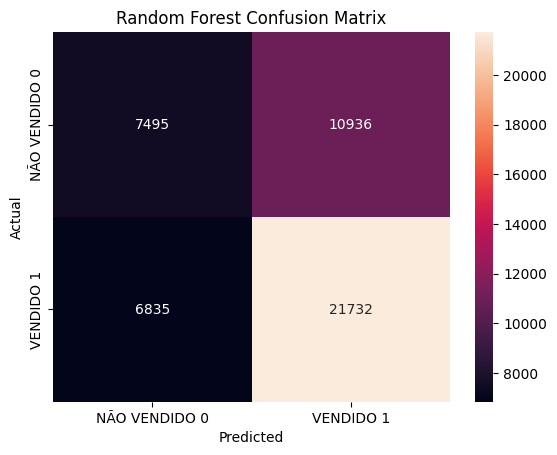

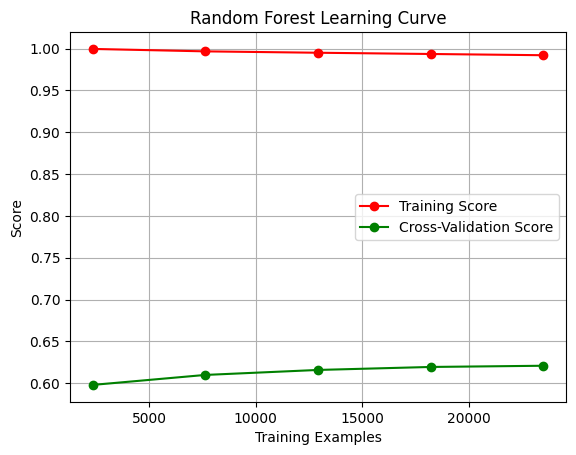

Random Forest Accuracy: 0.62


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


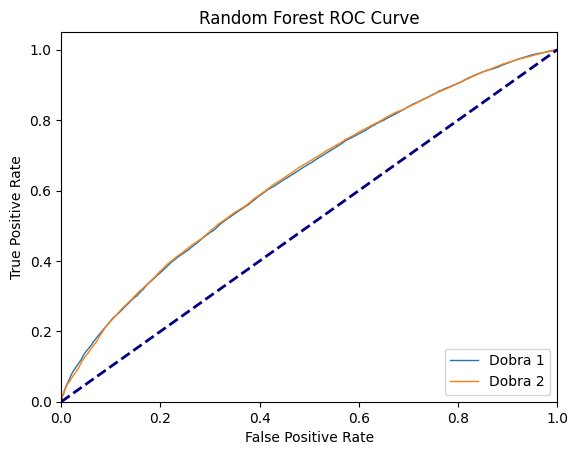

Training and evaluating Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     class 0       0.56      0.09      0.16     18431
     class 1       0.62      0.95      0.75     28567

    accuracy                           0.62     46998
   macro avg       0.59      0.52      0.45     46998
weighted avg       0.59      0.62      0.52     46998



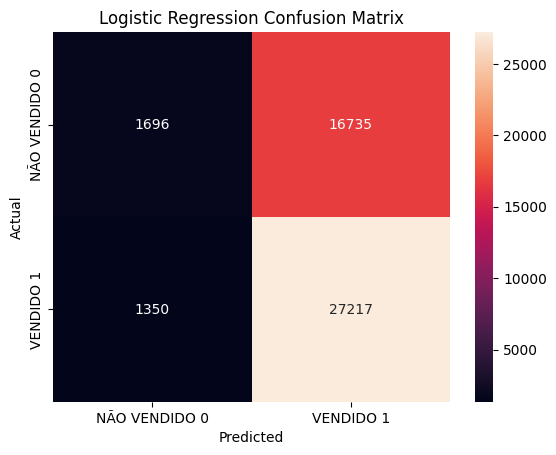

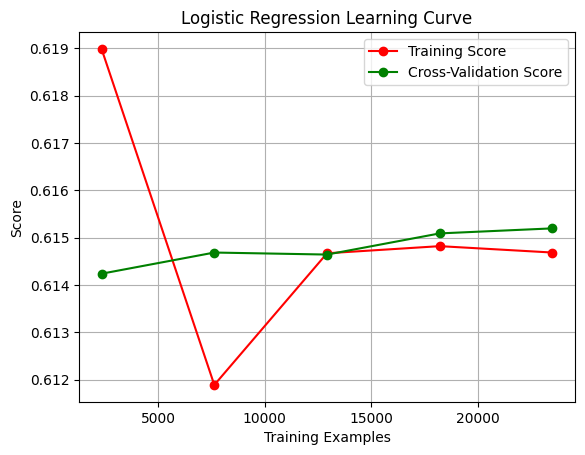

Logistic Regression Accuracy: 0.62


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


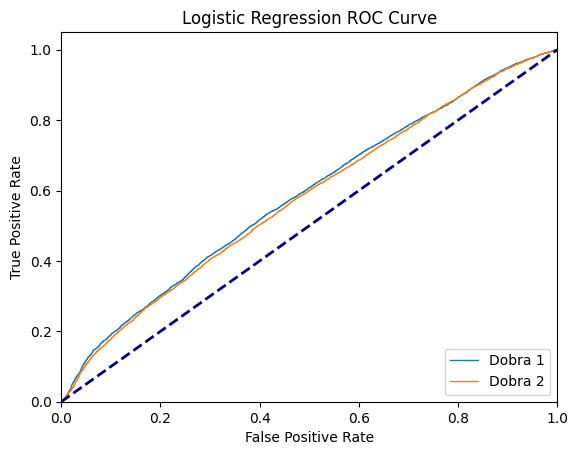

Training and evaluating KNN...
KNN Classification Report:
              precision    recall  f1-score   support

     class 0       0.47      0.38      0.42     18431
     class 1       0.64      0.72      0.68     28567

    accuracy                           0.59     46998
   macro avg       0.56      0.55      0.55     46998
weighted avg       0.58      0.59      0.58     46998



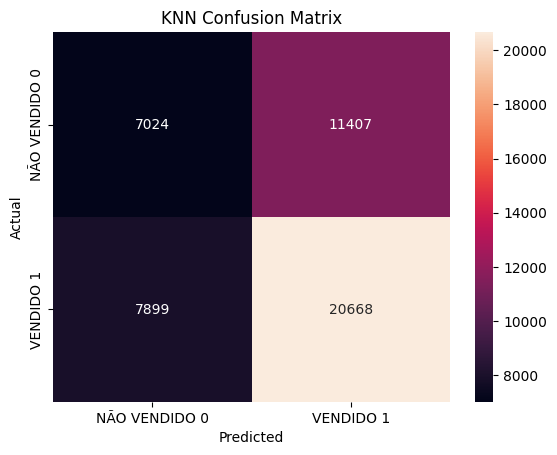

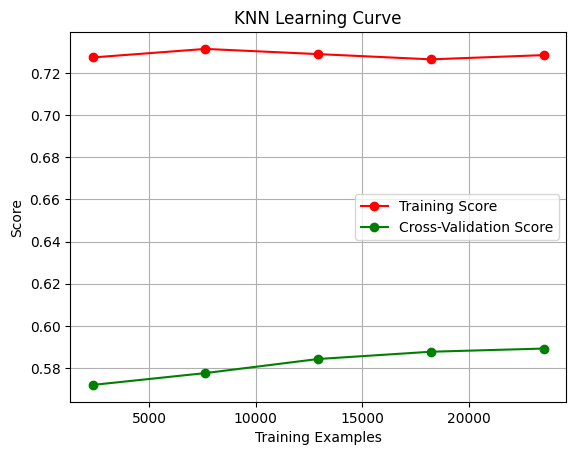

KNN Accuracy: 0.59


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


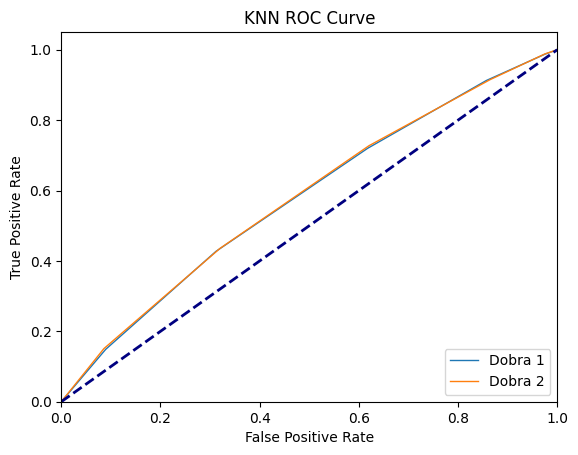

Training and evaluating Gaussian Naïve Bayes...
Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

     class 0       0.52      0.14      0.22     18431
     class 1       0.62      0.92      0.74     28567

    accuracy                           0.61     46998
   macro avg       0.57      0.53      0.48     46998
weighted avg       0.58      0.61      0.54     46998



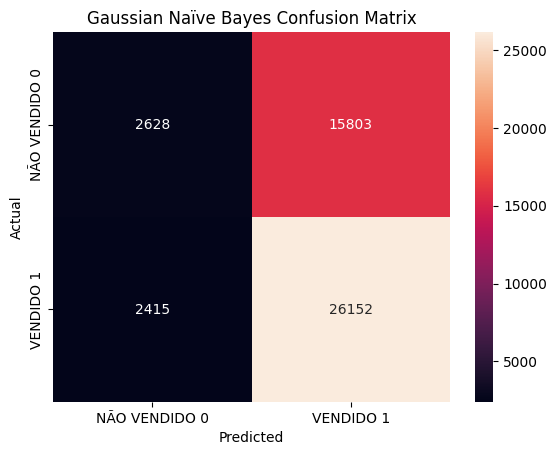

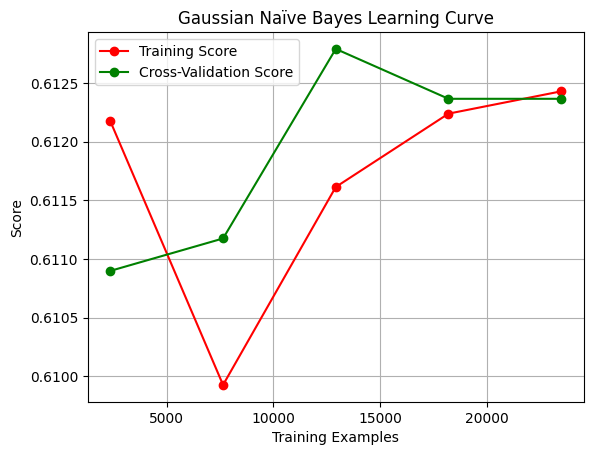

Gaussian Naïve Bayes Accuracy: 0.61


C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\filipe.sampaio\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


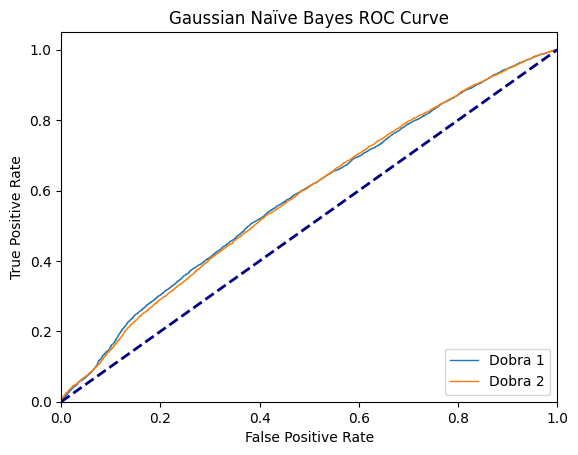

Training and evaluating Decision Tree Classifier...
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

     class 0       0.46      0.47      0.46     18431
     class 1       0.65      0.64      0.65     28567

    accuracy                           0.57     46998
   macro avg       0.55      0.56      0.55     46998
weighted avg       0.58      0.57      0.57     46998



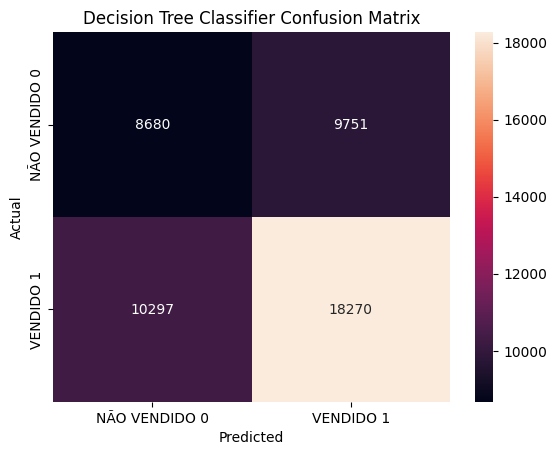

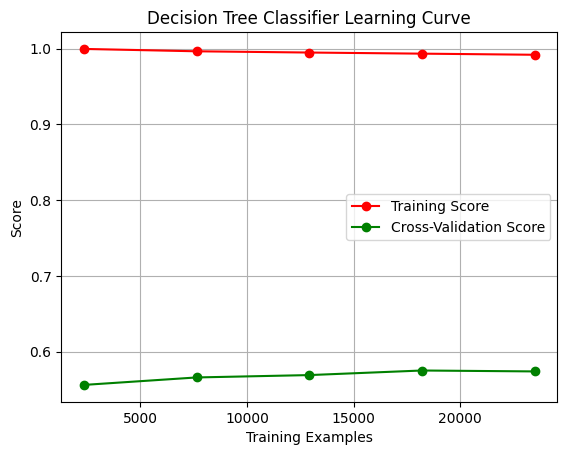

Decision Tree Classifier Accuracy: 0.57


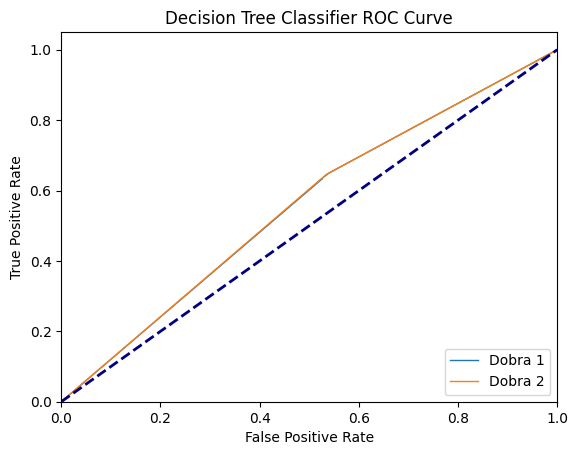

Training and evaluation of all models completed.


In [249]:
# Lista de modelos
models = [
    ('Random Forest', RandomForestClassifier()),
    #('SVM', SVC(kernel='sigmoid')),  # Use um kernel que suporte probabilidades
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian Naïve Bayes', GaussianNB()),
    #('Support Vector Machines', SVC()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
]

for name, model in models:
    print(f"Training and evaluating {name}...")

    # Treinamento e avaliação usando validação cruzada
    y_pred = cross_val_predict(model, X_train, y_train, cv=2)
    accuracy = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')

    # Estatísticas
    target_names = ['class 0', 'class 1']

    # Em seguida, use os rótulos de classe corrigidos no seu código
    print(f"{name} Classification Report:")
    print(classification_report(y_train, y_pred, target_names=target_names))

    # Matriz de Confusão
    cm = confusion_matrix(y_train, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=['NÃO VENDIDO 0','VENDIDO 1'], yticklabels=['NÃO VENDIDO 0','VENDIDO 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Curva de Aprendizado
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=2, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(f'{name} Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

    plt.legend(loc='best')
    plt.show()

    accuracy_mean = accuracy.mean()
    print(f"{name} Accuracy: {accuracy_mean:.2f}")

    # Curva ROC (fora do loop de validação cruzada)
    if name != 'SVM':  # SVM não suporta probabilidade
        lb = LabelBinarizer()
        y_bin = lb.fit_transform(y_train)
        
        # Use StratifiedKFold para manter a proporção de classes na validação cruzada
        cv = StratifiedKFold(n_splits=2)
        tpr_list = []
        fpr_list = []
        roc_auc_list = []
        
        for train_idx, test_idx in cv.split(X_train, y_train):
            X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
            y_train_fold, y_test_fold = y_bin[train_idx], y_bin[test_idx]
            
            model.fit(X_train_fold, y_train_fold)
            y_score = model.predict_proba(X_test_fold)
            fpr, tpr, _ = roc_curve(y_test_fold.ravel(), y_score[:, 1].ravel())
            roc_auc = auc(fpr, tpr)
            
            tpr_list.append(tpr)
            fpr_list.append(fpr)
            roc_auc_list.append(roc_auc)
        
        # Plot a curva ROC para cada dobra individual
        plt.figure()
        for i in range(len(tpr_list)):
            plt.plot(fpr_list[i], tpr_list[i], lw=1, label=f'Dobra {i+1}')
        
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


print("Training and evaluation of all models completed.")

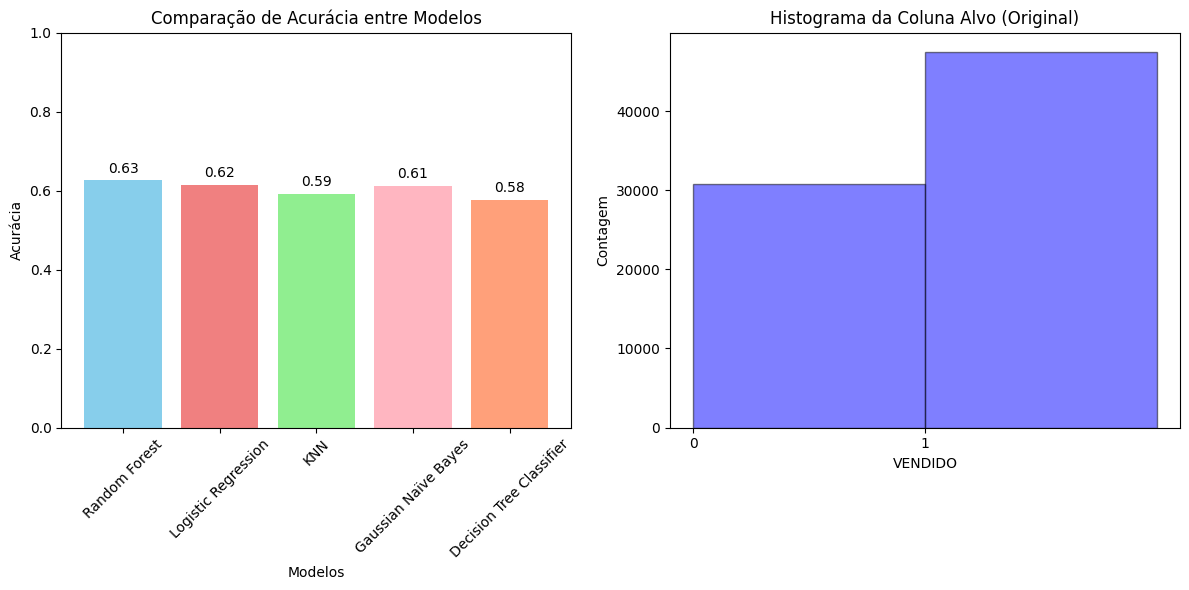

In [168]:
import matplotlib.pyplot as plt
import pandas as pd

# Crie uma lista para armazenar os resultados de cada modelo
model_names = []
accuracies = []

for name, model in models:
    # Treinamento e avaliação usando validação cruzada
    y_pred = cross_val_predict(model, X_train, y_train, cv=2)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Armazene os resultados do modelo atual
    model_names.append(name)
    accuracies.append(accuracy)

# Crie um gráfico de barras para comparar as precisões de cada modelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Defina cores para as barras
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen']

plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylim(0, 1.0)  # Defina o limite vertical de 0 a 1 para a precisão
plt.xticks(rotation=45)  # Rode os nomes dos modelos para facilitar a leitura

# Adicione as barras de precisão acima das barras
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center')

# Histograma da coluna alvo do dataset original
plt.subplot(1, 2, 2)
plt.hist(df['VENDIDO'], bins=[0, 1, 2], edgecolor='k', alpha=0.5, color='blue')
plt.xticks([0, 1])
plt.xlabel('VENDIDO')
plt.ylabel('Contagem')
plt.title('Histograma da Coluna Alvo (Original)')

plt.tight_layout()
plt.show()


In [64]:
df['VENDIDO'].value_counts()

1    47572
0    30759
Name: VENDIDO, dtype: int64

In [65]:
df['marca'].value_counts()

10361    4199
8597     3669
6619     2096
523      1771
5395     1617
         ... 
5319        1
9116        1
24          1
8635        1
6656        1
Name: marca, Length: 10501, dtype: int64

In [32]:
df2 = df2.drop('Unnamed: 0', axis =1)

In [33]:
df2

,marca,precoComDesconto,precoSemDesconto,Tamanho,Condicao,Cores
0,1462,64.00,160.0,39,2,643
1,2574,57.00,219.0,50,0,865
2,421,69.00,279.0,73,0,950
3,5782,25000.00,87500.0,74,4,585
4,5940,20.97,69.9,72,4,681
...,...,...,...,...,...,...
38577,4355,10000.00,32000.0,73,0,1066
38578,4944,12000.00,36000.0,73,2,0
38579,5319,13800.00,45900.0,73,0,991
38580,451,11.96,29.9,44,0,872


In [34]:
df

,marca,precoComDesconto,precoSemDesconto,Tamanho,Condicao,Cores,VENDIDO
0,8601,64.00,160.0,73,0,1823,0
1,10361,57.00,219.0,39,0,1460,1
2,18,69.00,279.0,39,0,1113,0
3,2160,25000.00,87500.0,40,4,727,1
4,7807,20.97,69.9,73,0,1385,0
...,...,...,...,...,...,...,...
78326,6062,15.00,69.9,73,0,1682,0
78327,6656,33.75,135.0,74,0,1220,1
78328,5802,27.48,89.9,72,0,1385,1
78329,10361,7000.00,28000.0,74,4,478,1


In [35]:
for name, model in models:
    y_pred = model.predict(df2.iloc[:35000])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score

y_real = df['VENDIDO'].sample(n=35000, random_state=42)
# Certifique-se de que o conjunto de dados de previsão (y_pred) também tenha 35.000 valores

In [37]:
y_real.shape

(35000,)

In [41]:
from sklearn.metrics import accuracy_score

# Crie uma lista para armazenar as acurácias de todos os modelos
acuracias = []

# Itere por todos os modelos
for name, model in models:
    # Faça a previsão para o modelo atual
    y_pred = model.predict(df2.iloc[:35000])
    
    # Calcule a acurácia
    y_real = df['VENDIDO'].sample(n=35000, random_state=42)  # Garanta que y_real tenha o mesmo número de amostras
    acuracia = accuracy_score(y_real, y_pred)
    
    # Armazene a acurácia na lista
    acuracias.append((name, acuracia))

# Imprima as acurácias de todos os modelos
for name, acuracia in acuracias:
    print(f'{name}: Acurácia = {acuracia:.2f}')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Random Forest: Acurácia = 0.61
Logistic Regression: Acurácia = 0.50
KNN: Acurácia = 0.52
Gaussian Naïve Bayes: Acurácia = 0.49
Decision Tree Classifier: Acurácia = 0.60


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [42]:
# Divida os dados em recursos (X) e rótulos (y)
X = df.drop('VENDIDO', axis=1)
y = df['VENDIDO']

# Codifique as colunas categóricas, se necessário
# Use One-Hot Encoding ou Label Encoding, conforme apropriado

# Divida os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Padronize os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Epoch 1/10
857/857 [==============================] - 2s 2ms/step - loss: 0.6563 - accuracy: 0.6178 - val_loss: 0.6554 - val_accuracy: 0.6166
Epoch 2/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.6198 - val_loss: 0.6533 - val_accuracy: 0.6181
Epoch 3/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6513 - accuracy: 0.6192 - val_loss: 0.6527 - val_accuracy: 0.6188
Epoch 4/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6499 - accuracy: 0.6202 - val_loss: 0.6513 - val_accuracy: 0.6191
Epoch 5/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6488 - accuracy: 0.6211 - val_loss: 0.6512 - val_accuracy: 0.6209
Epoch 6/10
857/857 [==============================] - 1s 2ms/step - loss: 0.6482 - accuracy: 0.6210 - val_loss: 0.6500 - val_accuracy: 0.6197
Epoch 7/10
857/857 [==============================] - 2s 2ms/step - loss: 0.6479 - accuracy: 0.6218 - val_loss: 0.6483 - val_accuracy: 0.6240
Epoch 

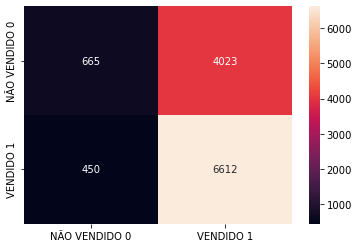

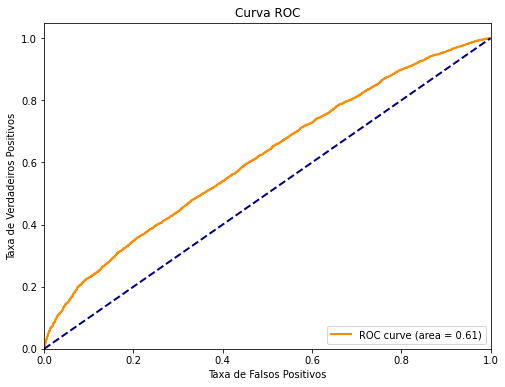

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, roc_curve, auc

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Treine o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Avalie o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Matriz de Confusão
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Matriz de Confusão:')
matriz = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', xticklabels=['NÃO VENDIDO 0','VENDIDO 1'], yticklabels=['NÃO VENDIDO 0','VENDIDO 1'])
print(matriz)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [45]:
import joblib
for model_name, model in models:
    joblib.dump(model, f'{model_name}_model.joblib')